# Financial Analyze and Advice on a Client´s portfolio

## The Case

It´s your first day as Financial Analyst in an Asset Management Firm that manages the Portfolios of High Net Worth Individuals (HNWI). <br><br>
Your Boss recently solicited a new Client, Mary Johnson, 65 years old. Mary recently retired after 30 Years as an independent physician. Her husband died soon and bequeathed a considerable Investment Portfolio to her. <br><br>
From 1997 until today she has been solely invested into __5 Health Care Stocks__, that are today the __most valuable__ Health Care Stocks in the US Market in terms of __Market Capitalization__. She strongly believes that it´s best to only invest into sectors where she has specific industry expertise (Health Care). She only trusts the largest and best-known companies in the market. Her Strategy has been pretty simple: Buying an __equal number of shares__ of each Stock and __reinvesting all dividends__ (assume no costs and taxes). <br> <br> 
Now that she has retired with no active work income (she needs to live from her Investment Portfolio), Mary decided to make her portfolio more suitable to the new situation. In a very first step, she agreed with your boss to sell parts of her five-Stocks Portfolio and invest into lower risk Government Bonds and high-quality Corporate Bonds.   <br> <br>
Now, as a next second step, it´s your task to guide her into a __more diversified Stock Portfolio that better reflects Modern Portfolio Theory__.   

---

## Summary
The project has 7 steps.
- Step 1: Import and Clean Data
- Step 2: Trend Analysis of Health Care Portfolio
- Step 3: Return Triangle of Health Care Portfolio
- Step 4: Interactive Normalized Price Chart of All Sectors Portfolio
- Step 5: Matric Comparison of All Sectors Portfolio
- Step 6: Health Care Portfolio Optimization Provement
- Step 7: Health Care Portfolio Optimization Process

----------------------

## Step 1: Import and Clean Data
Identify __the five stocks__ and get the respective __Stock Tickers__

### Import Packages and File

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import cufflinks as cf

plt.style.use("seaborn")
pd.options.display.float_format = '{:.3f}'.format

In [2]:
listings = pd.read_csv("listings_clean.csv", index_col = "Symbol")

In [3]:
listings.head()

,Exchange,Name,Last_Price,Market_Cap,IPO_Year,Sector,Industry
Symbol,,,,,,,
A,NYSE,"Agilent Technologies, Inc.",81.680,25934696179.920,1999,Capital Goods,Biotechnology: Laboratory Analytical Instruments
AA,NYSE,Alcoa Corporation,29.150,5407809589.600,2016,Basic Industries,Aluminum
AABA,NASDAQ,Altaba Inc.,75.390,42781131315.300,1969,Technology,EDP Services
AAC,NYSE,"AAC Holdings, Inc.",2.160,53141086.800,2014,Health Care,Medical Specialities
AAL,NASDAQ,"American Airlines Group, Inc.",34.020,15276869742.960,1969,Transportation,Air Freight/Delivery Services


In [4]:
listings.tail()

,Exchange,Name,Last_Price,Market_Cap,IPO_Year,Sector,Industry
Symbol,,,,,,,
ZUMZ,NASDAQ,Zumiez Inc.,26.720,681919062.560,2005,Consumer Services,Clothing/Shoe/Accessory Stores
ZUO,NYSE,"Zuora, Inc.",19.790,2147266454.000,2018,Technology,Computer Software: Prepackaged Software
ZYME,NYSE,Zymeworks Inc.,15.740,504078206.260,2017,Health Care,Major Pharmaceuticals
ZYNE,NASDAQ,"Zynerba Pharmaceuticals, Inc.",7.850,165399468.600,2015,Health Care,Major Pharmaceuticals
ZYXI,NASDAQ,"Zynex, Inc.",5.020,161834880.480,1969,Health Care,Biotechnology: Electromedical & Electrotherape...


### Top five stocks in "Health Care" Sector 

In [5]:
health = listings.loc[listings.Sector == "Health Care"].copy() # get sector 'health care' from all the other sectors

In [6]:
large_cap_hea = health.nlargest(n = 5, columns = "Market_Cap") # get 5 largest stock in sector 'health care' 

In [7]:
large_cap_hea

,Exchange,Name,Last_Price,Market_Cap,IPO_Year,Sector,Industry
Symbol,,,,,,,
JNJ,NYSE,Johnson & Johnson,135.580,361018644165.180,1969,Health Care,Major Pharmaceuticals
PFE,NYSE,"Pfizer, Inc.",42.730,237228618676.700,1969,Health Care,Major Pharmaceuticals
UNH,NYSE,UnitedHealth Group Incorporated,246.030,236075260845.450,1969,Health Care,Medical Specialities
MRK,NYSE,"Merck & Company, Inc.",80.820,208764129420.360,1969,Health Care,Major Pharmaceuticals
NVS,NYSE,Novartis AG,81.930,189354275177.970,1969,Health Care,Major Pharmaceuticals


### Top five stocks tickers

In [8]:
ticker = large_cap_hea.index.to_list() 
# convert index column in large_cap_hea into list, which is the ticker.
# Save the respective Stock Tickers/Symbols in a list.

In [9]:
ticker

['JNJ', 'PFE', 'UNH', 'MRK', 'NVS']

--------

## Step 2: Trend Analysis of Health Care Portfolio
Daily Return Index (1996-12-31 ~ 2018-12-31)

### Import historical prices from Yahoo Finance 
1. Only need adjusted close price and close price.
2. Need to install 'yfinance' at first.

In [10]:
start = "1997-01-01"
end = "2018-12-31"

In [11]:
stocks = yf.download(ticker, start= start, end = end )[["Adj Close", "Close"]]

[*********************100%***********************]  5 of 5 completed


In [12]:
stocks

Adj Close                                Close                \
                 JNJ    MRK    NVS    PFE     UNH     JNJ    MRK    NVS   
Date                                                                      
1997-01-02    13.834 16.323 13.526  6.007   4.718  24.875 38.108 25.594   
1997-01-03    13.973 16.885 13.437  6.135   4.849  25.125 39.420 25.426   
1997-01-06    14.078 16.936 13.408  6.108   4.862  25.312 39.540 25.370   
1997-01-07    14.112 16.962 13.437  6.199   4.875  25.375 39.599 25.426   
1997-01-08    14.217 16.757 13.408  6.199   4.771  25.562 39.122 25.370   
...              ...    ...    ...    ...     ...     ...    ...    ...   
2018-12-21   119.782 64.506 67.119 35.776 228.927 128.090 69.561 74.686   
2018-12-24   114.873 62.958 66.426 34.598 223.740 122.840 67.891 73.916   
2018-12-26   118.492 65.480 68.262 35.998 233.739 126.710 70.611 75.959   
2018-12-27   119.146 66.701 67.698 36.561 236.256 127.410 71.927 75.332   
2018-12-28   119.015 66.692 68.657 36.655 236.515 127.270 71.918 76.398   

                           
              PFE     UNH  
Date                       
1997-01-02 12.947   5.656  
1997-01-03 13.223   5.812  
1997-01-06 13.164   5.828  
1997-01-07 13.362   5.844  
1997-01-08 13.362   5.719  
...           ...     ...  
2018-12-21 39.782 238.340  
2018-12-24 38.472 232.940  
2018-12-26 40.028 243.350  
2018-12-27 40.655 245.970  
2018-12-28 40.759 246.240  

[5535 rows x 10 columns]

### Weight Constituent over Time of Close Price

In [13]:
weights = stocks.Close.div(stocks.Close.sum(axis = 1), axis = "index") 
# weights = close price/sum of the close price

In [14]:
weights

,JNJ,MRK,NVS,PFE,UNH
Date,,,,,
1997-01-02,0.232,0.356,0.239,0.121,0.053
1997-01-03,0.230,0.362,0.233,0.121,0.053
1997-01-06,0.232,0.362,0.232,0.121,0.053
1997-01-07,0.232,0.361,0.232,0.122,0.053
1997-01-08,0.234,0.358,0.232,0.122,0.052
...,...,...,...,...,...
2018-12-21,0.233,0.126,0.136,0.072,0.433
2018-12-24,0.229,0.127,0.138,0.072,0.435
2018-12-26,0.228,0.127,0.136,0.072,0.437


### Daily return of Adjusted Close Price

In [15]:
ret = stocks["Adj Close"].pct_change().dropna()
# pct_change: calculate daily return
# use adjust the close price to calculate the return base on the assumption that the dividend will be reinvested into the index

In [16]:
ret

,JNJ,MRK,NVS,PFE,UNH
Date,,,,,
1997-01-03,0.010,0.034,-0.007,0.021,0.028
1997-01-06,0.007,0.003,-0.002,-0.004,0.003
1997-01-07,0.002,0.002,0.002,0.015,0.003
1997-01-08,0.007,-0.012,-0.002,0.000,-0.021
1997-01-09,0.007,0.008,0.007,-0.009,-0.005
...,...,...,...,...,...
2018-12-21,-0.001,-0.008,-0.010,-0.000,-0.017
2018-12-24,-0.041,-0.024,-0.010,-0.033,-0.023
2018-12-26,0.032,0.040,0.028,0.040,0.045


### Daily retrun index of 'Health Care'
Calculate the daily return of the index by evading the daily return of the constituent 

In [17]:
hea_index = ret.mul(weights.shift().dropna()).sum(axis = 1).add(1).cumprod().mul(100)

In [18]:
hea_index

Date
1997-01-03   101.705
1997-01-06   101.898
1997-01-07   102.263
1997-01-08   101.824
1997-01-09   102.294
               ...  
2018-12-21   845.366
2018-12-24   823.252
2018-12-26   854.886
2018-12-27   862.005
2018-12-28   863.988
Length: 5534, dtype: float64

In [19]:
hea_index[pd.to_datetime("1996-12-31")] = 100 # Add one more timestamp on the end of 1996

In [20]:
hea_index

Date
1997-01-03   101.705
1997-01-06   101.898
1997-01-07   102.263
1997-01-08   101.824
1997-01-09   102.294
               ...  
2018-12-24   823.252
2018-12-26   854.886
2018-12-27   862.005
2018-12-28   863.988
1996-12-31   100.000
Length: 5535, dtype: float64

In [21]:
hea_index.sort_index(inplace = True)

In [22]:
hea_index.name = "Health Care"

In [23]:
hea_index

Date
1996-12-31   100.000
1997-01-03   101.705
1997-01-06   101.898
1997-01-07   102.263
1997-01-08   101.824
               ...  
2018-12-21   845.366
2018-12-24   823.252
2018-12-26   854.886
2018-12-27   862.005
2018-12-28   863.988
Name: Health Care, Length: 5535, dtype: float64

### 'Health Care' Portfolio Daily Return Plot

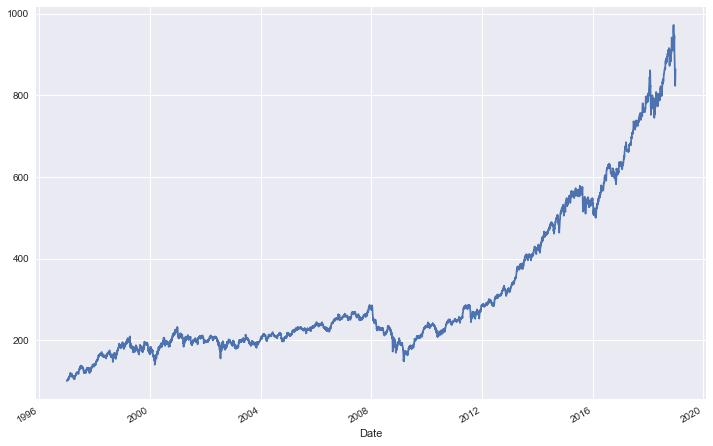

In [24]:
hea_index.plot(figsize = (12, 8))
plt.show()

### Conclusion
It is a good portfolio. Our clients' initial Investment increased eightfold in 22 Years.

---------

## Step 3: Return Triangle of Health Care Portfolio

### Annually Stock Price

In [25]:
annual = hea_index.resample("A", kind = "period").last().to_frame()
annual
# resample the health index, from daily to annually.

,Health Care
Date,
1996,100.000
1997,140.275
1998,188.914
1999,171.654
2000,232.098
2001,198.658
2002,188.970
2003,204.628
2004,218.452


In [26]:
annual.columns = ["Price"]

### Anually Stock Log Return

In [27]:
annual["Return"] = np.log(annual.Price / annual.Price.shift())

In [28]:
annual.dropna(inplace = True)

In [29]:
annual

,Price,Return
Date,,
1997,140.275,0.338
1998,188.914,0.298
1999,171.654,-0.096
2000,232.098,0.302
2001,198.658,-0.156
2002,188.970,-0.050
2003,204.628,0.080
2004,218.452,0.065
2005,235.661,0.076


In [30]:
years = annual.index.size
years

22

### Return Triangle Plot
Create and Plot a Return Triangle with annual log Returns

In [31]:
windows = [year for year in range(years, 0, -1)]
windows

[22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [32]:
for year in windows:
    annual["{}Y".format(year)] = annual.Return.rolling(year).mean()

In [33]:
annual

,Price,Return,22Y,21Y,20Y,19Y,18Y,17Y,16Y,15Y,...,10Y,9Y,8Y,7Y,6Y,5Y,4Y,3Y,2Y,1Y
Date,,,,,,,,,,,,,,,,,,,,,
1997,140.275,0.338,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.338
1998,188.914,0.298,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,0.318,0.298
1999,171.654,-0.096,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,0.180,0.101,-0.096
2000,232.098,0.302,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,0.210,0.168,0.103,0.302
2001,198.658,-0.156,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,0.137,0.087,0.017,0.073,-0.156
2002,188.970,-0.050,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,0.106,0.060,0.000,0.032,-0.103,-0.050
2003,204.628,0.080,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,0.102,0.063,0.016,0.044,-0.042,0.015,0.080
2004,218.452,0.065,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,0.098,0.063,0.024,0.048,-0.015,0.032,0.072,0.065
2005,235.661,0.076,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,0.095,0.065,0.032,0.053,0.003,0.043,0.074,0.071,0.076


In [34]:
triangle = annual.drop(columns = ["Price", "Return"])

In [35]:
triangle

,22Y,21Y,20Y,19Y,18Y,17Y,16Y,15Y,14Y,13Y,...,10Y,9Y,8Y,7Y,6Y,5Y,4Y,3Y,2Y,1Y
Date,,,,,,,,,,,,,,,,,,,,,
1997,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.338
1998,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,0.318,0.298
1999,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,0.180,0.101,-0.096
2000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,0.210,0.168,0.103,0.302
2001,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,0.137,0.087,0.017,0.073,-0.156
2002,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,0.106,0.060,0.000,0.032,-0.103,-0.050
2003,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,0.102,0.063,0.016,0.044,-0.042,0.015,0.080
2004,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,0.098,0.063,0.024,0.048,-0.015,0.032,0.072,0.065
2005,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,0.095,0.065,0.032,0.053,0.003,0.043,0.074,0.071,0.076


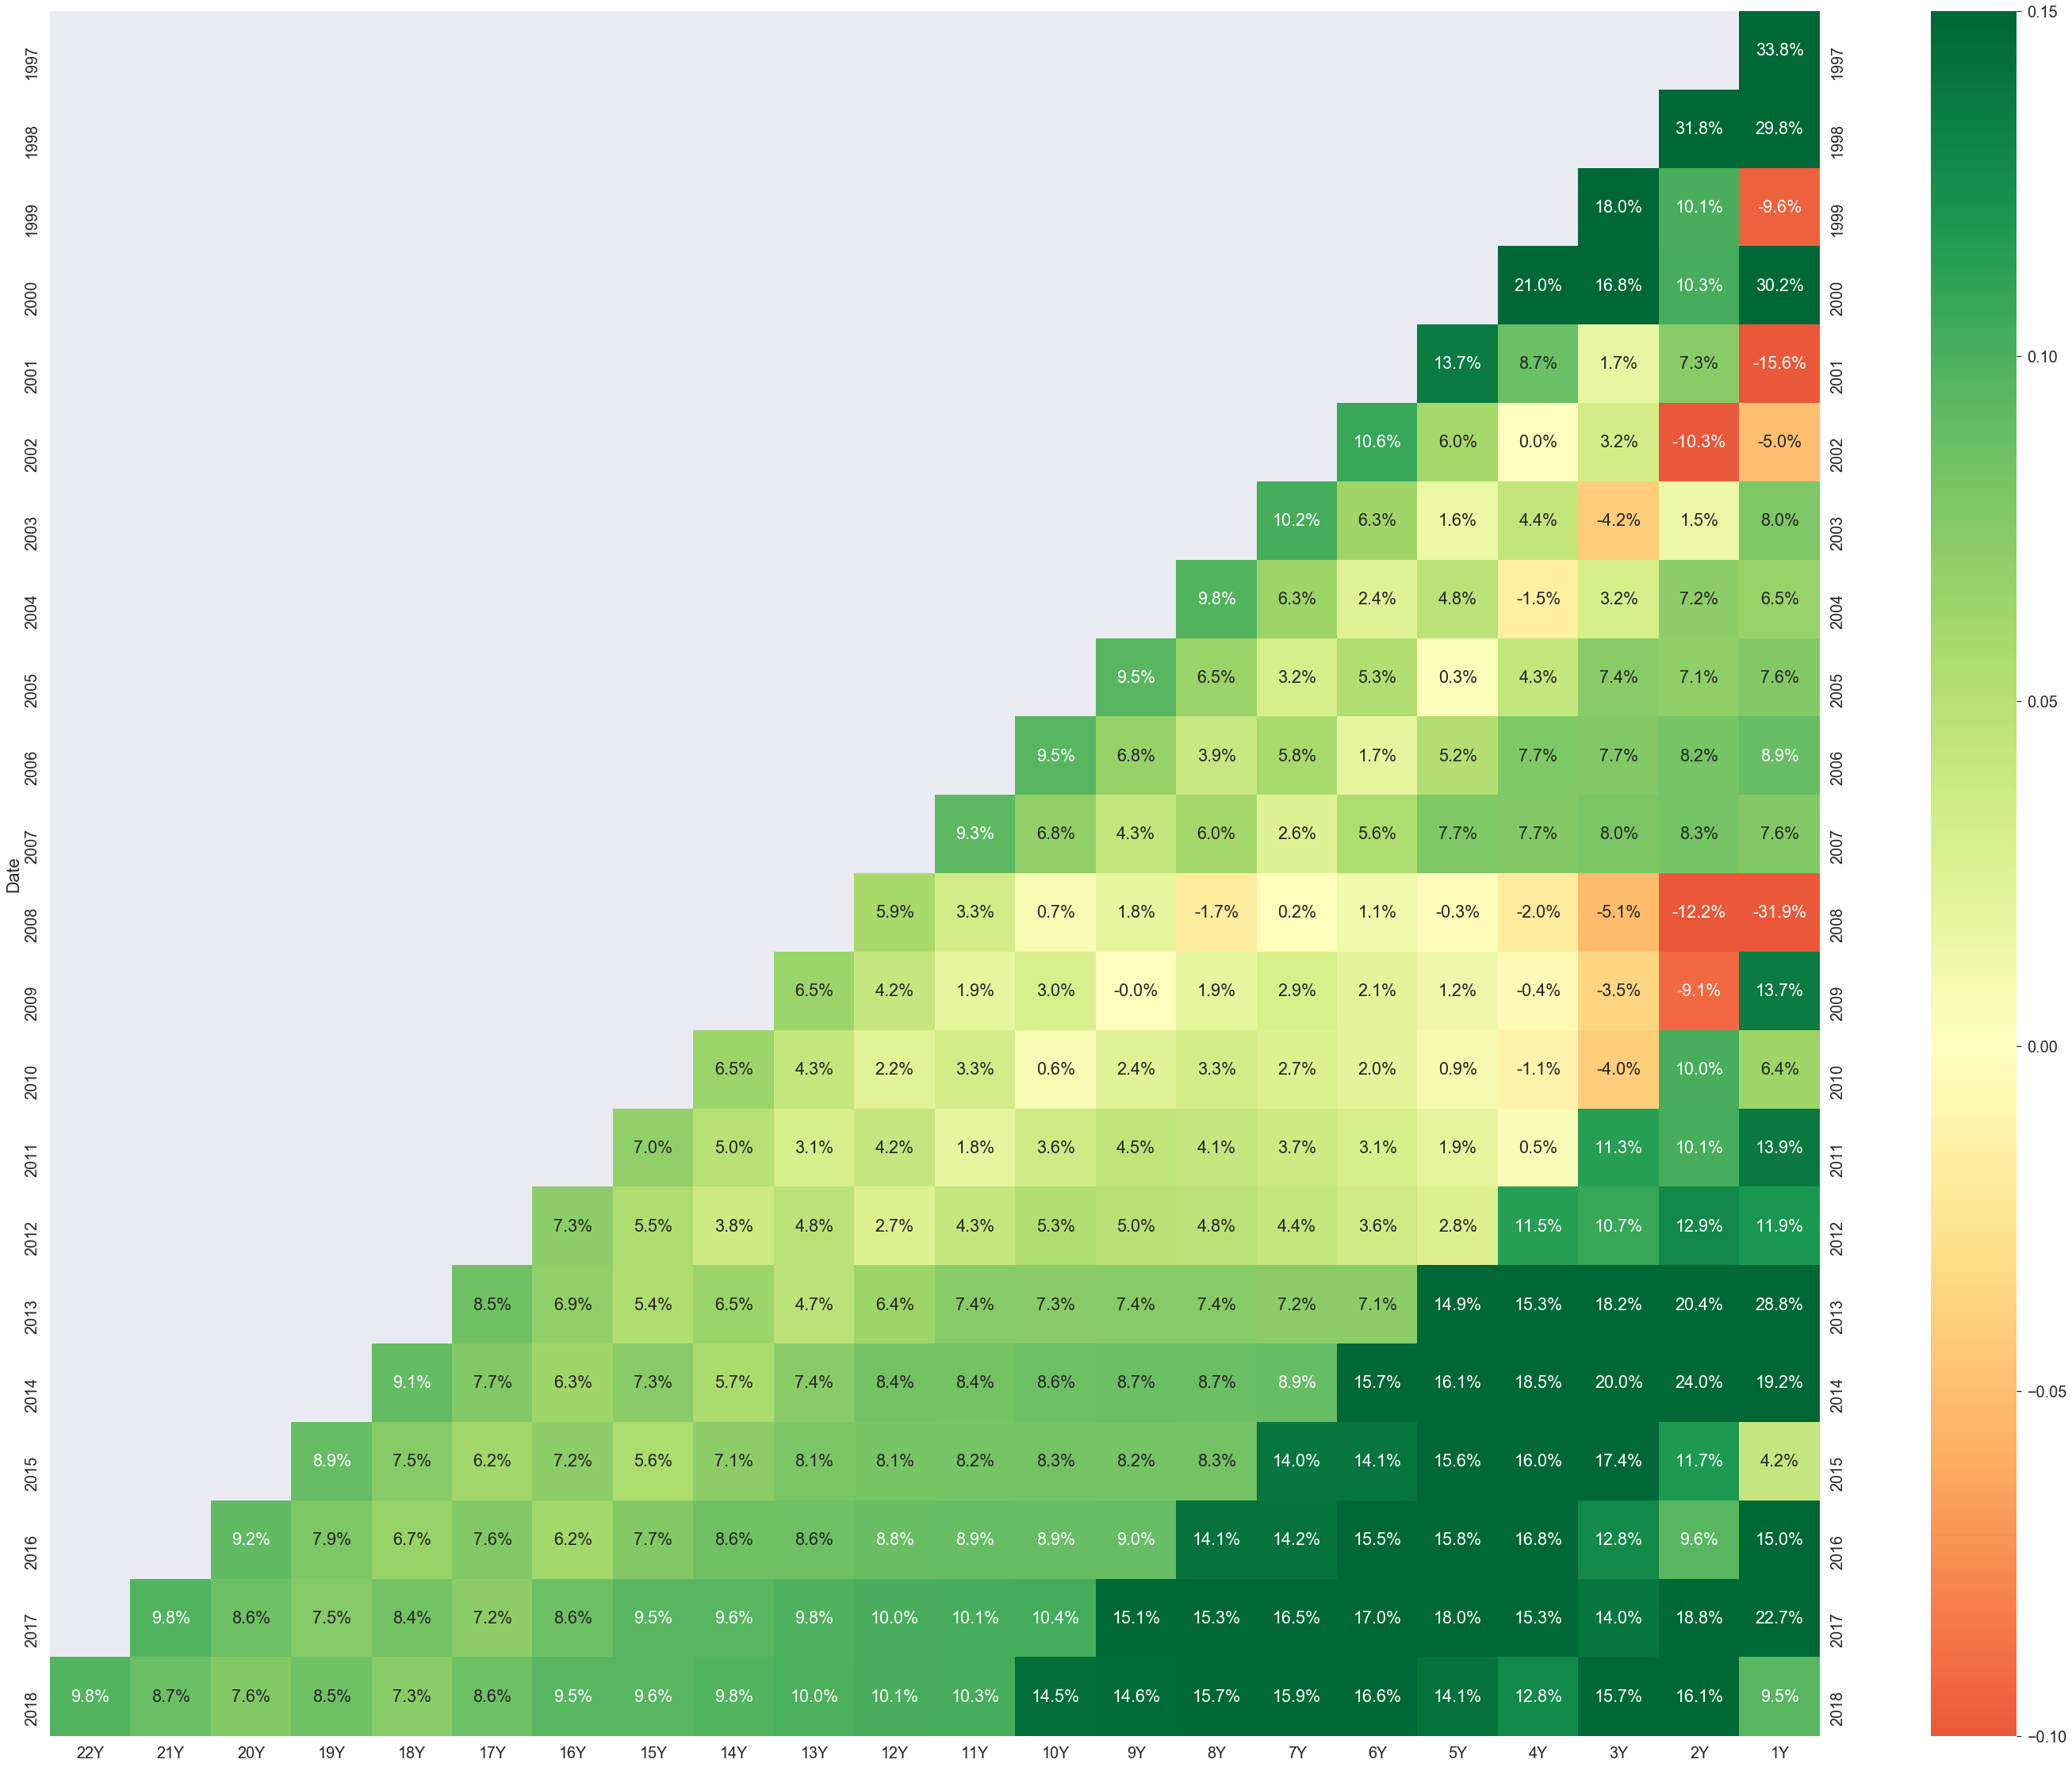

In [36]:
plt.figure(figsize=(50,40))
sns.set(font_scale=1.8)
sns.heatmap(triangle, annot = True, fmt = ".1%", cmap = "RdYlGn", 
            vmin = -0.10, vmax = 0.15, center = 0)
plt.tick_params(axis = "y", labelright =True)
plt.show()

### Conclusion
Our client Portfolio lost value in the nine-year Period from 2001 until 2009.

-----

## Step 4: Interactive Normalized Price Chart of All Sectors Portfolio
(2015-2018)

### Portfolio Performance Comparison

In [37]:
hea_index

Date
1996-12-31   100.000
1997-01-03   101.705
1997-01-06   101.898
1997-01-07   102.263
1997-01-08   101.824
               ...  
2018-12-21   845.366
2018-12-24   823.252
2018-12-26   854.886
2018-12-27   862.005
2018-12-28   863.988
Name: Health Care, Length: 5535, dtype: float64

In [38]:
indexes = pd.read_csv("sector_indexes.csv", parse_dates = ["Date"], index_col = "Date")

In [39]:
indexes.head()

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation
Date,,,,,,,,,,
2014-12-31,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000
2015-01-02,99.396,100.563,99.901,98.998,99.342,100.134,100.077,100.314,99.767,99.359
2015-01-05,97.446,99.091,98.780,97.864,97.627,95.941,97.222,99.129,97.770,96.619
2015-01-06,97.266,98.108,98.021,98.480,96.442,95.520,94.800,99.542,95.724,94.660
2015-01-07,98.120,99.918,98.925,100.025,98.010,96.130,95.350,100.710,95.702,95.214


In [40]:
indexes["Health_Care"] = hea_index

In [41]:
indexes.head()

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation,Health_Care
Date,,,,,,,,,,,
2014-12-31,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,516.757
2015-01-02,99.396,100.563,99.901,98.998,99.342,100.134,100.077,100.314,99.767,99.359,516.514
2015-01-05,97.446,99.091,98.780,97.864,97.627,95.941,97.222,99.129,97.770,96.619,514.348
2015-01-06,97.266,98.108,98.021,98.480,96.442,95.520,94.800,99.542,95.724,94.660,515.754
2015-01-07,98.120,99.918,98.925,100.025,98.010,96.130,95.350,100.710,95.702,95.214,523.091


In [42]:
indexes.Health_Care = indexes.Health_Care.div(indexes.Health_Care[0]).mul(100) # Normalized

In [43]:
indexes.head()

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation,Health_Care
Date,,,,,,,,,,,
2014-12-31,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000
2015-01-02,99.396,100.563,99.901,98.998,99.342,100.134,100.077,100.314,99.767,99.359,99.953
2015-01-05,97.446,99.091,98.780,97.864,97.627,95.941,97.222,99.129,97.770,96.619,99.534
2015-01-06,97.266,98.108,98.021,98.480,96.442,95.520,94.800,99.542,95.724,94.660,99.806
2015-01-07,98.120,99.918,98.925,100.025,98.010,96.130,95.350,100.710,95.702,95.214,101.226


In [44]:
indexes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2014-12-31 to 2018-12-28
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Basic Industries       1006 non-null   float64
 1   Capital Goods          1006 non-null   float64
 2   Consumer Durables      1006 non-null   float64
 3   Consumer Non-Durables  1006 non-null   float64
 4   Consumer Services      1006 non-null   float64
 5   Energy                 1006 non-null   float64
 6   Finance                1006 non-null   float64
 7   Public Utilities       1006 non-null   float64
 8   Technology             1006 non-null   float64
 9   Transportation         1006 non-null   float64
 10  Health_Care            1006 non-null   float64
dtypes: float64(11)
memory usage: 134.3 KB


### Interactive Normalized Price Chart

In [45]:
import cufflinks as cf

In [46]:
indexes.iplot()

### Conclusion
Health Care Sector is not the best performing sector. Consumer Services and Technology perform much better.

---

## Step 5: Metric Comparison of All Sectors Portfolio

Calculate the following __Metrics__ for the All the 11 Sector Indexes:
- Annualized Risk and Return 
- daily simple Returns
- Sharpe Ratio

In [47]:
indexes.head()

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation,Health_Care
Date,,,,,,,,,,,
2014-12-31,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000
2015-01-02,99.396,100.563,99.901,98.998,99.342,100.134,100.077,100.314,99.767,99.359,99.953
2015-01-05,97.446,99.091,98.780,97.864,97.627,95.941,97.222,99.129,97.770,96.619,99.534
2015-01-06,97.266,98.108,98.021,98.480,96.442,95.520,94.800,99.542,95.724,94.660,99.806
2015-01-07,98.120,99.918,98.925,100.025,98.010,96.130,95.350,100.710,95.702,95.214,101.226


### Daily Simple Return

In [48]:
ret = indexes.pct_change().dropna()

In [49]:
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return*252
    summary.Risk = summary.Risk * np.sqrt(252)
    return summary

In [50]:
ret

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation,Health_Care
Date,,,,,,,,,,,
2015-01-02,-0.006,0.006,-0.001,-0.010,-0.007,0.001,0.001,0.003,-0.002,-0.006,-0.000
2015-01-05,-0.020,-0.015,-0.011,-0.011,-0.017,-0.042,-0.029,-0.012,-0.020,-0.028,-0.004
2015-01-06,-0.002,-0.010,-0.008,0.006,-0.012,-0.004,-0.025,0.004,-0.021,-0.020,0.003
2015-01-07,0.009,0.018,0.009,0.016,0.016,0.006,0.006,0.012,-0.000,0.006,0.014
2015-01-08,0.014,0.016,0.018,0.017,0.013,0.022,0.017,0.010,0.009,0.023,0.027
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,-0.003,-0.024,0.003,-0.019,-0.049,-0.004,-0.025,-0.006,-0.033,-0.013,-0.010
2018-12-24,-0.026,-0.033,-0.054,-0.018,-0.024,-0.030,-0.021,-0.035,-0.008,-0.031,-0.026
2018-12-26,0.032,0.047,0.037,0.020,0.086,0.050,0.041,0.018,0.066,0.056,0.038


### Annualized Risk and Return

In [51]:
summary = ann_risk_return(ret)

In [52]:
summary

,Return,Risk
Basic Industries,0.077,0.163
Capital Goods,0.138,0.163
Consumer Durables,0.082,0.142
Consumer Non-Durables,0.045,0.140
Consumer Services,0.310,0.234
Energy,0.045,0.204
Finance,0.073,0.203
Public Utilities,0.092,0.127
Technology,0.190,0.225
Transportation,0.079,0.186


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


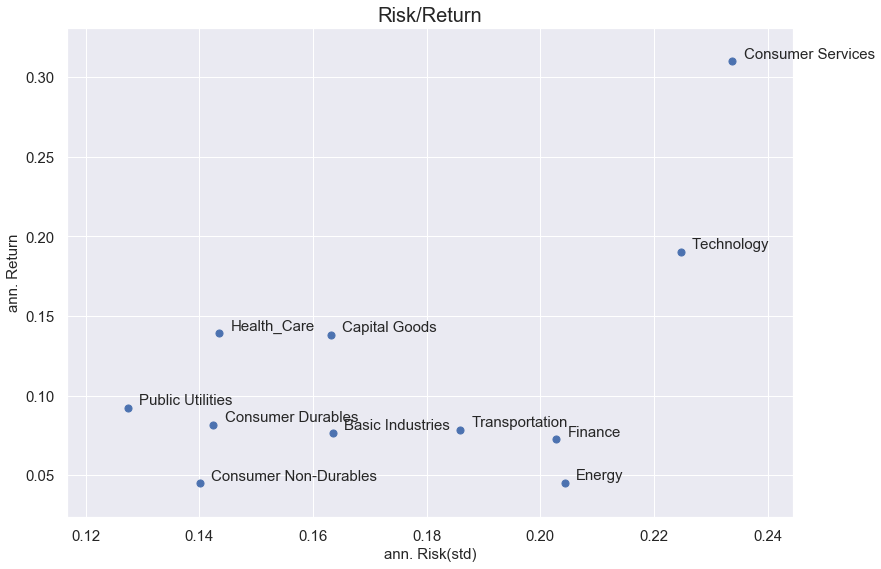

In [53]:
summary.plot(kind = "scatter", x = "Risk", y = "Return", figsize = (13,9), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Risk"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

### Conclusion 1
Health Care Sector performs good. It is in the left side, which is in low risk and high return.

### Sharpe Ratio
#### Define Risk Free Rate
Assume a risk-free Return of 1.3% p.a.

In [54]:
rf = [0.013, 0]
rf

[0.013, 0]

#### Sharpe Ratio in different industries

In [55]:
summary["Sharpe"] = (summary.Return - rf[0]) / summary.Risk

In [56]:
summary.sort_values("Sharpe", ascending = False)

,Return,Risk,Sharpe
Consumer Services,0.310,0.234,1.271
Health_Care,0.139,0.144,0.879
Technology,0.190,0.225,0.789
Capital Goods,0.138,0.163,0.768
Public Utilities,0.092,0.127,0.621
Consumer Durables,0.082,0.142,0.483
Basic Industries,0.077,0.163,0.390
Transportation,0.079,0.186,0.353
Finance,0.073,0.203,0.294
Consumer Non-Durables,0.045,0.140,0.229


### Conclusion 2
The Large-Cap Health Sector showed the second highest Sharpe Ratio, which is 0.879.

---

##  Step 6: Health Care Portfolio Optimization Provement
1.Simulate 50,000 __random Portfolios__ (use np.random.seed(111)).<p>
2.Calculate the following __Metrics__ for the All the 11 Sector Indexes:
- Annualized Risk and Return 
- Sharpe Ratio

### Create Random Portforlio

In [57]:
ret.head()

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation,Health_Care
Date,,,,,,,,,,,
2015-01-02,-0.006,0.006,-0.001,-0.010,-0.007,0.001,0.001,0.003,-0.002,-0.006,-0.000
2015-01-05,-0.020,-0.015,-0.011,-0.011,-0.017,-0.042,-0.029,-0.012,-0.020,-0.028,-0.004
2015-01-06,-0.002,-0.010,-0.008,0.006,-0.012,-0.004,-0.025,0.004,-0.021,-0.020,0.003
2015-01-07,0.009,0.018,0.009,0.016,0.016,0.006,0.006,0.012,-0.000,0.006,0.014
2015-01-08,0.014,0.016,0.018,0.017,0.013,0.022,0.017,0.010,0.009,0.023,0.027


In [58]:
noa = len(ret.columns)
noa

11

In [59]:
nop = 50000

In [60]:
np.random.seed(111)
matrix = np.random.random(noa * nop).reshape(nop, noa)

In [61]:
weights = matrix / matrix.sum(axis = 1, keepdims= True)

In [62]:
weights

array([[0.13785123, 0.03807189, 0.09819373, ..., 0.05374751, 0.07603494,
        0.22309308],
       [0.04681619, 0.01598951, 0.13186639, ..., 0.17739217, 0.15635744,
        0.16553591],
       [0.12969312, 0.15765315, 0.09183974, ..., 0.13001331, 0.11100301,
        0.08993248],
       ...,
       [0.11569744, 0.09323125, 0.08836689, ..., 0.09080952, 0.11341557,
        0.06591838],
       [0.20231586, 0.13734279, 0.09988422, ..., 0.06725256, 0.12817164,
        0.08679184],
       [0.13898176, 0.0131797 , 0.07500721, ..., 0.16656342, 0.01204152,
        0.09847087]])

In [63]:
weights

array([[0.13785123, 0.03807189, 0.09819373, ..., 0.05374751, 0.07603494,
        0.22309308],
       [0.04681619, 0.01598951, 0.13186639, ..., 0.17739217, 0.15635744,
        0.16553591],
       [0.12969312, 0.15765315, 0.09183974, ..., 0.13001331, 0.11100301,
        0.08993248],
       ...,
       [0.11569744, 0.09323125, 0.08836689, ..., 0.09080952, 0.11341557,
        0.06591838],
       [0.20231586, 0.13734279, 0.09988422, ..., 0.06725256, 0.12817164,
        0.08679184],
       [0.13898176, 0.0131797 , 0.07500721, ..., 0.16656342, 0.01204152,
        0.09847087]])

In [64]:
port_ret = ret.dot(weights.T) # Use dot. method to create random portfolio

In [65]:
port_ret.head()

,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,-0.003,-0.003,-0.003,-0.001,-0.002,-0.002,-0.002,-0.001,-0.000,-0.002,...,-0.001,-0.001,-0.003,-0.003,-0.001,-0.002,-0.000,-0.002,-0.002,-0.003
2015-01-05,-0.014,-0.018,-0.017,-0.018,-0.020,-0.023,-0.019,-0.019,-0.022,-0.021,...,-0.020,-0.018,-0.016,-0.018,-0.018,-0.021,-0.018,-0.020,-0.018,-0.019
2015-01-06,-0.003,-0.008,-0.009,-0.008,-0.006,-0.010,-0.006,-0.011,-0.012,-0.010,...,-0.010,-0.006,-0.008,-0.006,-0.008,-0.008,-0.011,-0.011,-0.007,-0.006
2015-01-07,0.012,0.009,0.011,0.012,0.011,0.009,0.011,0.011,0.009,0.009,...,0.009,0.011,0.010,0.012,0.012,0.009,0.008,0.010,0.010,0.009
2015-01-08,0.018,0.018,0.017,0.018,0.015,0.020,0.017,0.019,0.017,0.016,...,0.016,0.018,0.017,0.016,0.019,0.016,0.015,0.017,0.017,0.016


### Risk and Return

In [66]:
port_summary = ann_risk_return(port_ret)

In [67]:
port_summary

,Return,Risk
0,0.110,0.122
1,0.115,0.133
2,0.119,0.133
3,0.121,0.133
4,0.119,0.132
...,...,...
49995,0.114,0.134
49996,0.116,0.132
49997,0.126,0.139
49998,0.099,0.130


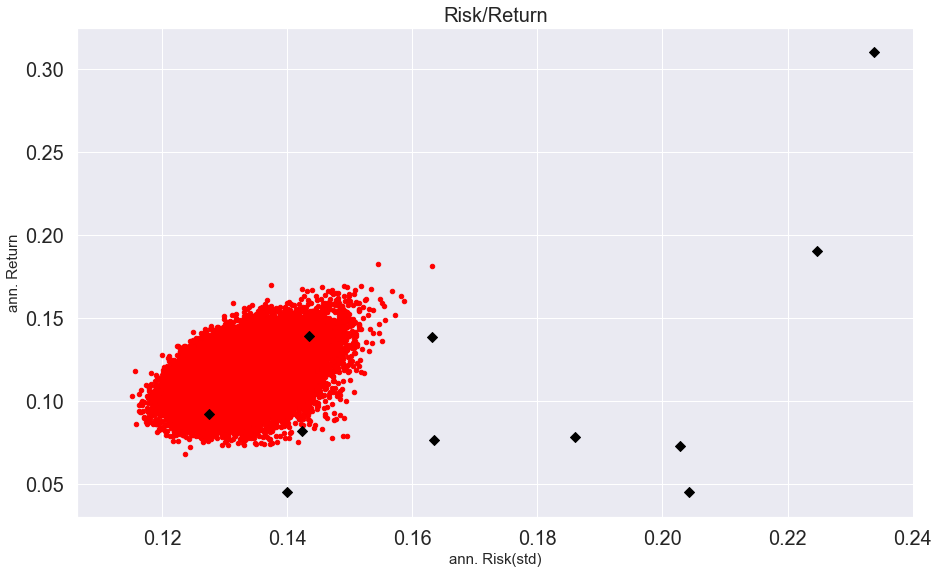

In [68]:
plt.figure(figsize = (15, 9))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"],s= 20, color = "red")
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"], s= 50, color = "black", marker = "D")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

### Conclusion 1
Red area is the cloud of potential portfolio.

### Sharpe Ratio

In [69]:
port_summary["Sharpe"] = (port_summary.Return - rf[0]) / port_summary.Risk

In [70]:
port_summary

,Return,Risk,Sharpe
0,0.110,0.122,0.798
1,0.115,0.133,0.769
2,0.119,0.133,0.794
3,0.121,0.133,0.811
4,0.119,0.132,0.800
...,...,...,...
49995,0.114,0.134,0.757
49996,0.116,0.132,0.777
49997,0.126,0.139,0.815
49998,0.099,0.130,0.663


In [71]:
port_summary.describe()

,Return,Risk,Sharpe
count,50000.000,50000.000,50000.000
mean,0.115,0.132,0.774
std,0.014,0.005,0.092
min,0.068,0.115,0.440
25%,0.106,0.129,0.710
50%,0.115,0.132,0.777
75%,0.125,0.136,0.840
max,0.182,0.163,1.142


In [72]:
msrp = port_summary.Sharpe.idxmax()
msrp

46957

In [73]:
msrp_p = port_summary.iloc[msrp]
msrp_p

Return   0.170
Risk     0.137
Sharpe   1.142
Name: 46957, dtype: float64

In [74]:
summary

,Return,Risk,Sharpe
Basic Industries,0.077,0.163,0.390
Capital Goods,0.138,0.163,0.768
Consumer Durables,0.082,0.142,0.483
Consumer Non-Durables,0.045,0.140,0.229
Consumer Services,0.310,0.234,1.271
Energy,0.045,0.204,0.158
Finance,0.073,0.203,0.294
Public Utilities,0.092,0.127,0.621
Technology,0.190,0.225,0.789
Transportation,0.079,0.186,0.353


In [75]:
msrp_w = weights[msrp, :]
msrp_w

array([0.13014365, 0.04369762, 0.09228104, 0.00534677, 0.28593317,
       0.00373666, 0.0099978 , 0.10496562, 0.05529165, 0.01815424,
       0.25045178])

In [76]:
pd.Series(index = indexes.columns, data = msrp_w)

Basic Industries        0.130
Capital Goods           0.044
Consumer Durables       0.092
Consumer Non-Durables   0.005
Consumer Services       0.286
Energy                  0.004
Finance                 0.010
Public Utilities        0.105
Technology              0.055
Transportation          0.018
Health_Care             0.250
dtype: float64

### Conclusion 2
Shapre Ratio will change when portfolio becomes diversify.

---

## Step 7: Health Care Portfolio Optimization  Process

1.Use the S&P 500 Total Return Index is __the Market Portfolio__ (SP500_TR.csv). <p>
2.Calculate the following __Metrics__ for the Sector Indexes and the Market Portfolio:<p>
- Annualized Risk and Return (daily simple Returns)
- Sharpe Ratio
- Annualized Total Risk in Variance units
- Systematic Risk
- Unsystematic Risk
- Beta
- CAPM Return
- Alpha<p>

3.Identify Sectors with positive __Alpha__ and a __Beta-Factor__ < 1. 

In [77]:
ret.head()

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation,Health_Care
Date,,,,,,,,,,,
2015-01-02,-0.006,0.006,-0.001,-0.010,-0.007,0.001,0.001,0.003,-0.002,-0.006,-0.000
2015-01-05,-0.020,-0.015,-0.011,-0.011,-0.017,-0.042,-0.029,-0.012,-0.020,-0.028,-0.004
2015-01-06,-0.002,-0.010,-0.008,0.006,-0.012,-0.004,-0.025,0.004,-0.021,-0.020,0.003
2015-01-07,0.009,0.018,0.009,0.016,0.016,0.006,0.006,0.012,-0.000,0.006,0.014
2015-01-08,0.014,0.016,0.018,0.017,0.013,0.022,0.017,0.010,0.009,0.023,0.027


In [78]:
indexes.head()

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation,Health_Care
Date,,,,,,,,,,,
2014-12-31,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000
2015-01-02,99.396,100.563,99.901,98.998,99.342,100.134,100.077,100.314,99.767,99.359,99.953
2015-01-05,97.446,99.091,98.780,97.864,97.627,95.941,97.222,99.129,97.770,96.619,99.534
2015-01-06,97.266,98.108,98.021,98.480,96.442,95.520,94.800,99.542,95.724,94.660,99.806
2015-01-07,98.120,99.918,98.925,100.025,98.010,96.130,95.350,100.710,95.702,95.214,101.226


### Use S&P 500 Total Return Index as the Market Portfolio 

In [79]:
SP500 = pd.read_csv("SP500_TR.csv", parse_dates = ["Date"], index_col = "Date")["Close"]

In [80]:
SP500 = SP500.reindex(indexes.index)

In [81]:
ret_SP = SP500.pct_change().dropna()

In [82]:
ret_SP.head()

Date
2015-01-02   -0.000
2015-01-05   -0.018
2015-01-06   -0.009
2015-01-07    0.012
2015-01-08    0.018
Name: Close, dtype: float64

In [83]:
ret["SP500"] = ret_SP

In [84]:
ret

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation,Health_Care,SP500
Date,,,,,,,,,,,,
2015-01-02,-0.006,0.006,-0.001,-0.010,-0.007,0.001,0.001,0.003,-0.002,-0.006,-0.000,-0.000
2015-01-05,-0.020,-0.015,-0.011,-0.011,-0.017,-0.042,-0.029,-0.012,-0.020,-0.028,-0.004,-0.018
2015-01-06,-0.002,-0.010,-0.008,0.006,-0.012,-0.004,-0.025,0.004,-0.021,-0.020,0.003,-0.009
2015-01-07,0.009,0.018,0.009,0.016,0.016,0.006,0.006,0.012,-0.000,0.006,0.014,0.012
2015-01-08,0.014,0.016,0.018,0.017,0.013,0.022,0.017,0.010,0.009,0.023,0.027,0.018
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,-0.003,-0.024,0.003,-0.019,-0.049,-0.004,-0.025,-0.006,-0.033,-0.013,-0.010,-0.021
2018-12-24,-0.026,-0.033,-0.054,-0.018,-0.024,-0.030,-0.021,-0.035,-0.008,-0.031,-0.026,-0.027
2018-12-26,0.032,0.047,0.037,0.020,0.086,0.050,0.041,0.018,0.066,0.056,0.038,0.050


### Annualized Risk and Return (daily simple Returns)

In [85]:
summary = ann_risk_return(ret)

In [86]:
summary

,Return,Risk
Basic Industries,0.077,0.163
Capital Goods,0.138,0.163
Consumer Durables,0.082,0.142
Consumer Non-Durables,0.045,0.140
Consumer Services,0.310,0.234
Energy,0.045,0.204
Finance,0.073,0.203
Public Utilities,0.092,0.127
Technology,0.190,0.225
Transportation,0.079,0.186


### Sharpe Ratio

In [87]:
summary["Sharpe"] = (summary["Return"].sub(rf[0]))/summary["Risk"]
summary["TotalRisk_var"] = np.power(summary.Risk, 2)

### Annualized Total Risk in Variance units

In [88]:
COV = ret.cov()*252

In [89]:
COV

,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Public Utilities,Technology,Transportation,Health_Care,SP500
Basic Industries,0.027,0.017,0.014,0.014,0.016,0.024,0.019,0.010,0.016,0.017,0.013,0.016
Capital Goods,0.017,0.027,0.014,0.012,0.022,0.020,0.023,0.009,0.022,0.021,0.017,0.019
Consumer Durables,0.014,0.014,0.020,0.013,0.013,0.013,0.012,0.011,0.012,0.014,0.012,0.013
Consumer Non-Durables,0.014,0.012,0.013,0.020,0.012,0.012,0.010,0.011,0.012,0.011,0.011,0.012
Consumer Services,0.016,0.022,0.013,0.012,0.055,0.019,0.021,0.009,0.038,0.020,0.017,0.022
Energy,0.024,0.020,0.013,0.012,0.019,0.042,0.025,0.010,0.018,0.023,0.015,0.020
Finance,0.019,0.023,0.012,0.010,0.021,0.025,0.041,0.006,0.021,0.024,0.017,0.022
Public Utilities,0.010,0.009,0.011,0.011,0.009,0.010,0.006,0.016,0.008,0.008,0.009,0.009
Technology,0.016,0.022,0.012,0.012,0.038,0.018,0.021,0.008,0.050,0.018,0.017,0.022
Transportation,0.017,0.021,0.014,0.011,0.020,0.023,0.024,0.008,0.018,0.035,0.015,0.019


### Systematic & Unsystematic Risk

In [90]:
summary["SystRisk_var"] = COV.iloc[:, -1]

In [91]:
summary["UnsystRisk_var"] = summary["TotalRisk_var"].sub(summary["SystRisk_var"])

In [92]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var
Basic Industries,0.077,0.163,0.390,0.027,0.016,0.011
Capital Goods,0.138,0.163,0.768,0.027,0.019,0.007
Consumer Durables,0.082,0.142,0.483,0.020,0.013,0.007
Consumer Non-Durables,0.045,0.140,0.229,0.020,0.012,0.008
Consumer Services,0.310,0.234,1.271,0.055,0.022,0.032
Energy,0.045,0.204,0.158,0.042,0.020,0.022
Finance,0.073,0.203,0.294,0.041,0.022,0.019
Public Utilities,0.092,0.127,0.621,0.016,0.009,0.007
Technology,0.190,0.225,0.789,0.050,0.022,0.029
Transportation,0.079,0.186,0.353,0.035,0.019,0.016


### Beta, CAMP Return and Alpha

In [93]:
summary["beta"] = summary.SystRisk_var / summary.loc["SP500", "SystRisk_var"]

In [94]:
summary["capm_ret"] = rf[0] + (summary.loc["SP500", "Return"] - rf[0]) * summary.beta

In [95]:
summary["alpha"] = summary.Return - summary.capm_ret

In [96]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,capm_ret,alpha
Basic Industries,0.077,0.163,0.390,0.027,0.016,0.011,0.848,0.067,0.009
Capital Goods,0.138,0.163,0.768,0.027,0.019,0.007,1.042,0.080,0.058
Consumer Durables,0.082,0.142,0.483,0.020,0.013,0.007,0.694,0.058,0.024
Consumer Non-Durables,0.045,0.140,0.229,0.020,0.012,0.008,0.623,0.053,-0.008
Consumer Services,0.310,0.234,1.271,0.055,0.022,0.032,1.205,0.090,0.220
Energy,0.045,0.204,0.158,0.042,0.020,0.022,1.052,0.081,-0.035
Finance,0.073,0.203,0.294,0.041,0.022,0.019,1.164,0.088,-0.015
Public Utilities,0.092,0.127,0.621,0.016,0.009,0.007,0.470,0.043,0.049
Technology,0.190,0.225,0.789,0.050,0.022,0.029,1.177,0.089,0.102
Transportation,0.079,0.186,0.353,0.035,0.019,0.016,1.020,0.079,0.000


In [97]:
summary.loc[(summary.alpha > 0) & (summary.beta < 1)]

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,capm_ret,alpha
Basic Industries,0.077,0.163,0.390,0.027,0.016,0.011,0.848,0.067,0.009
Consumer Durables,0.082,0.142,0.483,0.020,0.013,0.007,0.694,0.058,0.024
Public Utilities,0.092,0.127,0.621,0.016,0.009,0.007,0.470,0.043,0.049
Health_Care,0.139,0.144,0.879,0.021,0.016,0.005,0.835,0.067,0.073


### Conclusion:
For portfolio optimization, I suggest to add the Sectors Basic Industries, Consumer Durables and Public Utilities to our client´s Health Care Portfolio.